# Support Vector Classifier (SCV)

### Fabricate and Visualize the Dataset

Fabricate dataset for classifying vehicle speeds based on the size of a bump, and vehicle's distance from it:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_blobs

n_samples = 10000

# Generate fabricated data set (create two blobs of randomly distributed data at two corners of the graph)
centers = [(0.9, 0.05), (0.05, 0.94)]
x, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.4,
                  centers=centers, shuffle=False, random_state=42)

# Filter out only the values that lie within [0,1]:
features = []
labels = []
for feature, label in zip(x, y):
    if (feature[0] >= 0 and feature[0] <= 1.0 and feature[1] >= 0 and feature[1] <= 1.0):
        features.append(feature)
        labels.append(label)

# Convert the results back into numpy arrays:
x = np.array(features)
y = np.array(labels)

Visualize the dataset:

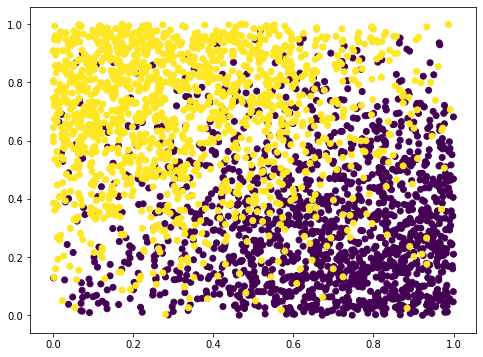

In [2]:
%matplotlib inline
from pylab import *

plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], c=y.astype(np.float))
plt.show()

### Fit the Data

Use linear SVC to partition the graph into clusters:

In [3]:
from sklearn import svm, datasets
svc = svm.SVC(kernel='linear', C=1.0).fit(x, y)

### Visualize the results

Render the regions of each cluster as distinct colors by setting up a dense mesh of points in the grid and classifying all of them:

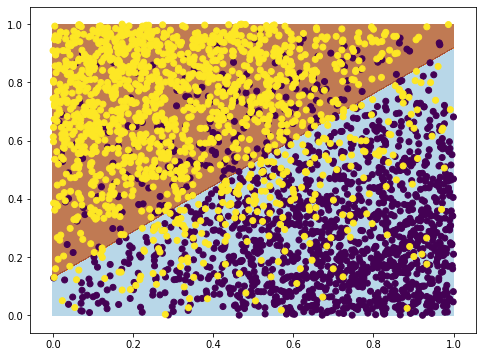

In [4]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 1.0, 0.001),
                     np.arange(0, 1.0, 0.001))
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 6))
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(x[:,0], x[:,1], c=y.astype(np.float))
    plt.show()
    
plotPredictions(svc)

### Predict for any given point:

In [5]:
print(svc.predict([[0.3, 0.3]]))

[0]


In [6]:
print(svc.predict([[0, 1]]))

[1]


### Calculate the Accuracy

In [7]:
from sklearn.model_selection import cross_val_score

fold_scores = cross_val_score(svc, x, y, cv=5)
print (fold_scores)
print (np.mean(fold_scores))

[0.86721311 0.83934426 0.8407225  0.83087028 0.83415435]
0.8424609006971924


### Hyperparameter Tuning

Try a better kernel - RBF. However, RBF kernel, although very powerful, is prone to over-fitting if gamma is set too high.

Tune gamma value using GridSearchCV, which is an easy way of doing k-fold cross validation over an array of different parameter values.

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

param_grid = dict(gamma=[0, 0.5, 1.0, 2.0, 3.0, 10.0, 100.0, 1000.0])
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=10)
grid.fit(x, y)

print("The best parameter is %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameter is {'gamma': 0.5} with a score of 0.84


Visualize the results:

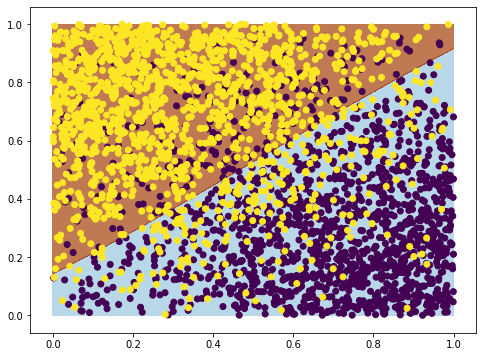

In [9]:
svc = svm.SVC(kernel='rbf', gamma=grid.best_params_['gamma']).fit(x, y)

plotPredictions(svc)

Since gamma is too low, the results are similar to those of a linear kernel. So, maybe RBF is overkill for this dataset.

Hence assume that linear kernel is the way to go, and just try to tune its hyperparameter "C":

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

param_grid = dict(C=[0.1, 0.5, 1.0, 2.0, 3.0, 10.0, 100.0, 1000.0])
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid=param_grid, cv=10)
grid.fit(x, y)

print("The best parameter is %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameter is {'C': 0.5} with a score of 0.84


Visualize the results:

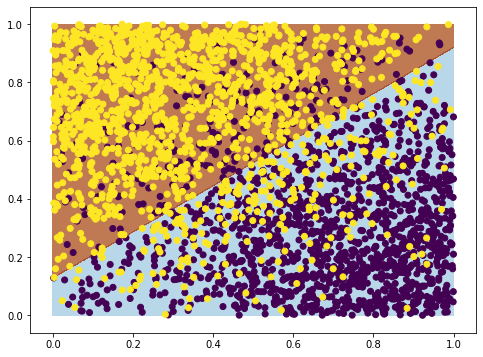

In [11]:
svc = svm.SVC(kernel='linear', C=grid.best_params_['C']).fit(x, y)

plotPredictions(svc)